In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# Breast cancer Wisconsin (diagnostic) dataset

（乳がんウィスコンシン診断データセット）

---

**データセットの特性:**

- インスタンス数: 569
- 属性数: 30（数値属性、予測属性）＋クラス

**属性情報:**

- 半径 (中心から輪郭上の点までの距離の平均)
- テクスチャ (グレースケール値の標準偏差)
- 周長
- 面積
- 平滑度 (半径長の局所的変動)
- コンパクト度 (perimeter² / area - 1.0)
- 凹度 (輪郭における凹部分の深さの度合い)
- 凹点数 (凹部分の数)
- 対称性
- フラクタル次元 ("海岸線近似" - 1)

これらの特徴量について、「平均」「標準誤差」「Worst（最大値の平均）」を算出した結果、30 特徴量となっている。  
例: フィールド 0 は平均半径、フィールド 10 は半径の標準誤差、フィールド 20 は Worst 半径。

- クラス:
  - WDBC-Malignant（悪性）
  - WDBC-Benign（良性）

---

**要約統計量:**

| 特徴量                    | Min   | Max    |
| ------------------------- | ----- | ------ |
| radius (mean)             | 6.981 | 28.11  |
| texture (mean)            | 9.71  | 39.28  |
| perimeter (mean)          | 43.79 | 188.5  |
| area (mean)               | 143.5 | 2501.0 |
| smoothness (mean)         | 0.053 | 0.163  |
| compactness (mean)        | 0.019 | 0.345  |
| concavity (mean)          | 0.0   | 0.427  |
| concave points (mean)     | 0.0   | 0.201  |
| symmetry (mean)           | 0.106 | 0.304  |
| fractal dimension (mean)  | 0.05  | 0.097  |
| radius (SE)               | 0.112 | 2.873  |
| texture (SE)              | 0.36  | 4.885  |
| perimeter (SE)            | 0.757 | 21.98  |
| area (SE)                 | 6.802 | 542.2  |
| smoothness (SE)           | 0.002 | 0.031  |
| compactness (SE)          | 0.002 | 0.135  |
| concavity (SE)            | 0.0   | 0.396  |
| concave points (SE)       | 0.0   | 0.053  |
| symmetry (SE)             | 0.008 | 0.079  |
| fractal dimension (SE)    | 0.001 | 0.03   |
| radius (worst)            | 7.93  | 36.04  |
| texture (worst)           | 12.02 | 49.54  |
| perimeter (worst)         | 50.41 | 251.2  |
| area (worst)              | 185.2 | 4254.0 |
| smoothness (worst)        | 0.071 | 0.223  |
| compactness (worst)       | 0.027 | 1.058  |
| concavity (worst)         | 0.0   | 1.252  |
| concave points (worst)    | 0.0   | 0.291  |
| symmetry (worst)          | 0.156 | 0.664  |
| fractal dimension (worst) | 0.055 | 0.208  |

---

**欠損値:** なし  
**クラス分布:** 212（悪性）、357（良性）

**作成者:** Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian  
**提供者:** Nick Street  
**作成年:** 1995 年 11 月

---

このデータセットは UCI ML Breast Cancer Wisconsin (Diagnostic) datasets のコピー。  
https://goo.gl/U2Uwz2

特徴量は、乳腫瘍の細針吸引検査（Fine Needle Aspirate: FNA）のデジタル画像から算出された。  
細胞核の特徴を記述している。

分離平面は「Multisurface Method-Tree (MSM-T)」により得られた（線形計画法を用いた決定木構築手法）。1 ～ 4 特徴量と 1 ～ 3 分離平面の空間での探索により選択された。

実際に使用された線形計画法は以下に記載されている：

- K. P. Bennett, O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, pp. 23-34.

UW CS ftp サーバーからも入手可能:

---

## 参考文献

- W.N. Street, W.H. Wolberg, O.L. Mangasarian.  
  Nuclear feature extraction for breast tumor diagnosis.  
  _IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology_, Vol. 1905, pp. 861–870, San Jose, CA, 1993.

- O.L. Mangasarian, W.N. Street, W.H. Wolberg.  
  Breast cancer diagnosis and prognosis via linear programming.  
  _Operations Research_, 43(4), pp. 570–577, July–August 1995.

- W.H. Wolberg, W.N. Street, O.L. Mangasarian.  
  Machine learning techniques to diagnose breast cancer from fine-needle aspirates.  
  _Cancer Letters_ 77 (1994), pp. 163–171.


In [3]:
import numpy as np

# クラスごとのサンプルの個数
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}

In [4]:
# 特徴量の名前
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

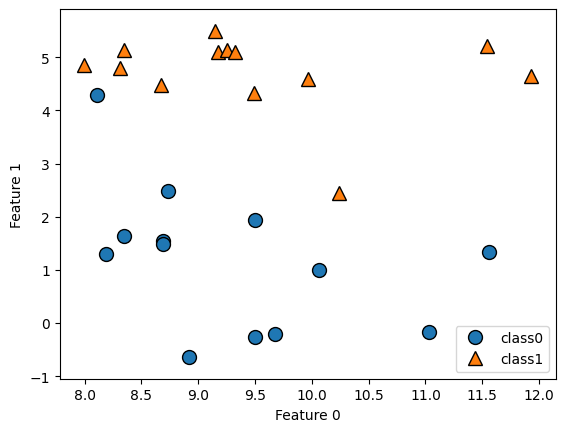

In [5]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class0", "class1"], loc=4)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## k-最近傍法


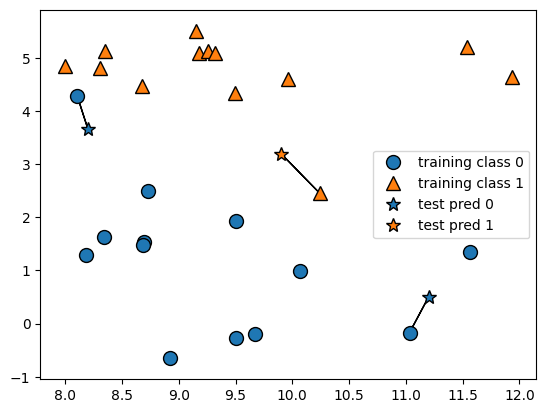

In [6]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=1)

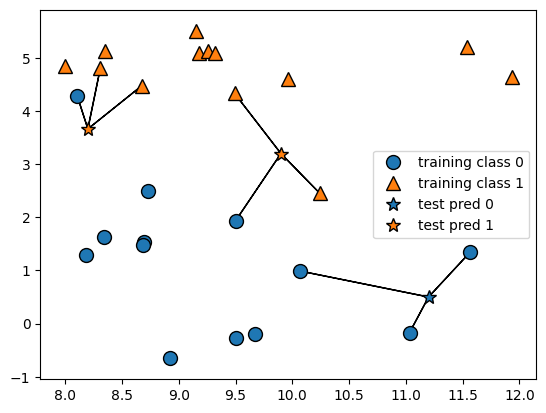

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## sk-learn を使って N-最近傍法をやる


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


## KNeighborsClassfier の解析


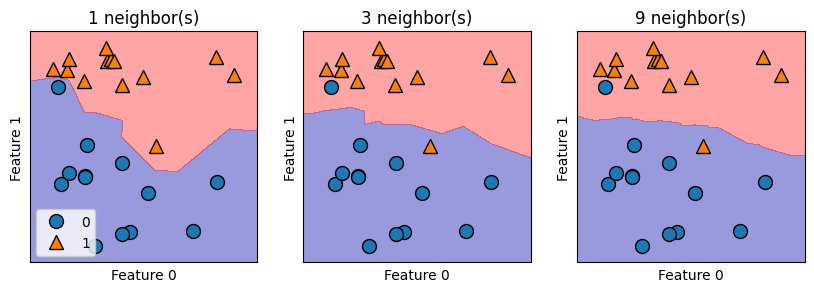

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)
plt.show()

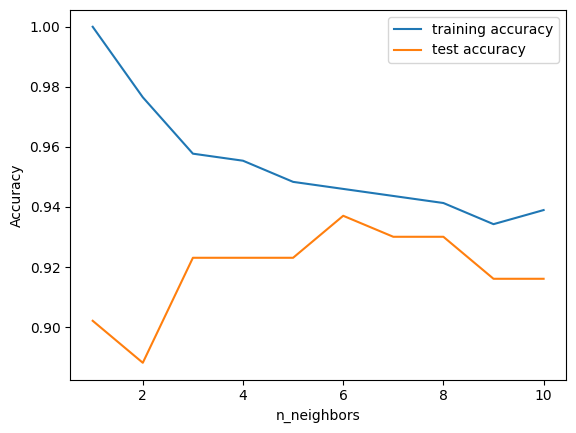

In [10]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []
# 近傍の数を１－１１で試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルの構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練データとテストデータの精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

## k-近傍回帰

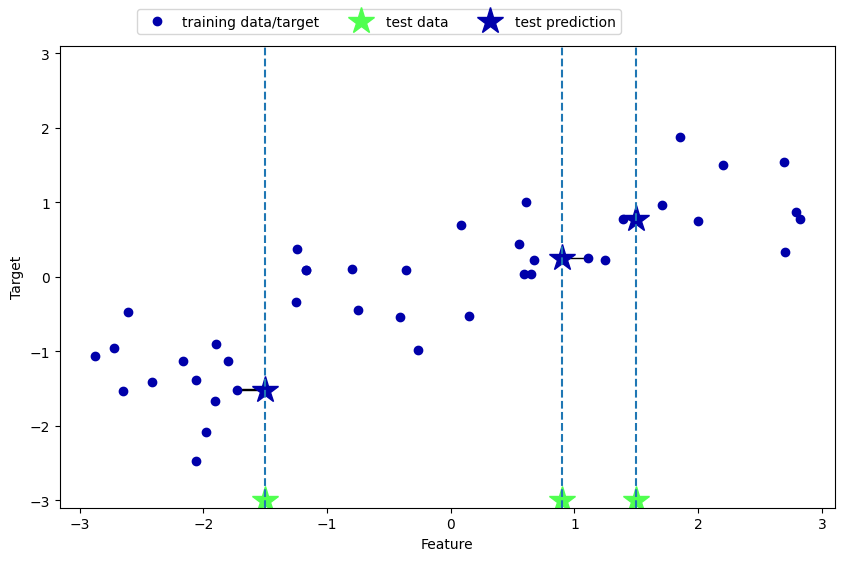

In [11]:
import mglearn

mglearn.plots.plot_knn_regression(n_neighbors=1)

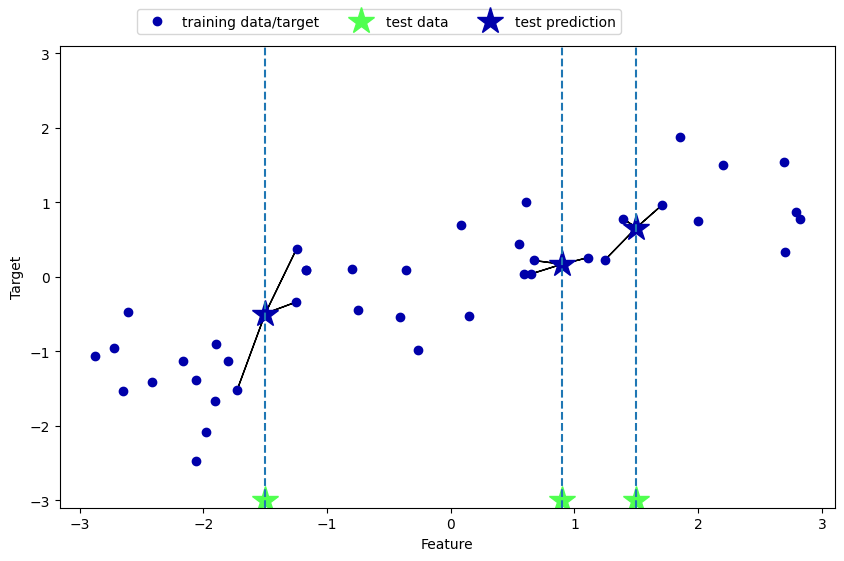

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## sklearnで近傍回帰を実装する

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


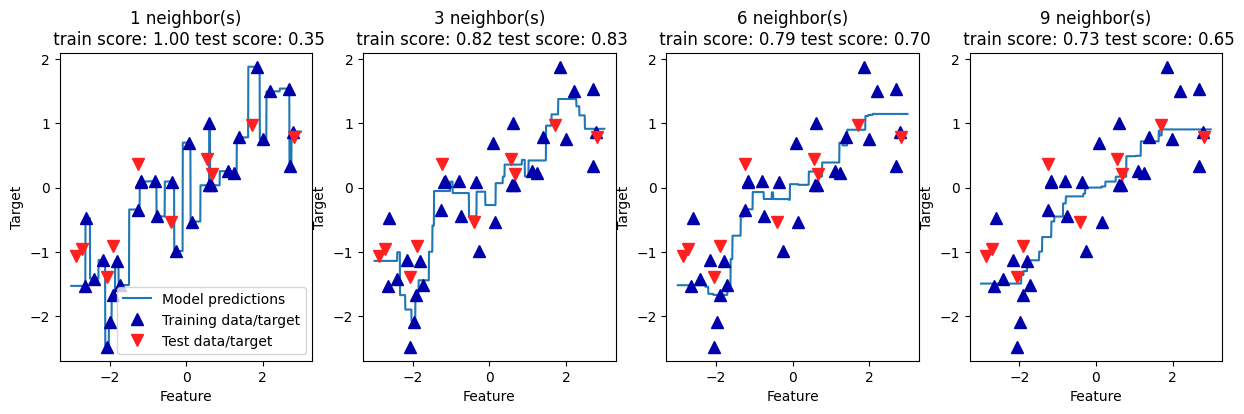

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 6, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(
    ["Model predictions", "Training data/target", "Test data/target"], loc="best"
)

## 最小二乗法による予測

In [20]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

print("Coefficients:\n{}".format(reg.coef_))
print("Intercept:\n{}".format(reg.intercept_))
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Coefficients:
[0.39390555]
Intercept:
-0.031804343026759746
Test set predictions:
[-0.3283204  -0.84483835 -0.49358667  0.35230624 -0.71167167  0.19957573
  1.02910669  0.07859229  0.75390167 -0.75032857 -0.47681266  1.07802761
 -0.8104986   0.2013684   1.00692209]
Test set R^2: 0.66
